# Pneumonia Detection with Convolutional Neural Networks

## 1. Introduction & Problem Statement

This project focuses on applying Convolutional Neural Networks (CNNs) and Transfer Learning to detect pneumonia from chest X-ray images.

### Problem Statement
Pneumonia is a potentially life-threatening infection that inflames the air sacs in one or both lungs. Early and accurate diagnosis is crucial for effective treatment and patient recovery. Traditional diagnostic methods include physical examination and radiographic imaging. However, interpreting X-ray images accurately can be challenging and is prone to human error. 

Deep Learning, particularly Convolutional Neural Networks (CNNs), has shown significant success in various image classification tasks. By leveraging Transfer Learning with pre-trained models such as ResNet, we can achieve high accuracy even with limited datasets, making it suitable for medical diagnostics where labeled data is often scarce.



## About CNN

Convolutional neural networks (CNN) They are neural networks making features extraction over an image before classifying it. The feature extraction performed consists of three basic operations:

* Filter an image for a particular feature (convolution)
* Detect that feature within the filtered image (using the ReLU activation)
* Condense the image to enhance the features (maximum pooling)

In [3]:
pip install opencv-python


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

#  Import Packages and Functions
We will be using the following packages:

* numpy and pandas is what we'll use to manipulate our data
* matplotlib.pyplot and seaborn will be used to produce plots for visualization
* We will use several modules from the keras framework for building deep learning models.



In [7]:
len(os.listdir("/Users/aman/Desktop/Desktop - Aman’s MacBook Air/Winter Sem/Data Mining/Final Project/Dataset/chest_xray"))

4

The dataset is divided into three sets:
1) Train set
2) Validation set
3) Test set.

# Data Visualization


In [12]:
train_folder = "/Users/aman/Desktop/Desktop - Aman’s MacBook Air/Winter Sem/Data Mining/Final Project/Dataset/chest_xray/train"
test_folder = "/Users/aman/Desktop/Desktop - Aman’s MacBook Air/Winter Sem/Data Mining/Final Project/Dataset/chest_xray/test"
val_folder = "/Users/aman/Desktop/Desktop - Aman’s MacBook Air/Winter Sem/Data Mining/Final Project/Dataset/chest_xray/val"
pneumonia = os.listdir("/Users/aman/Desktop/Desktop - Aman’s MacBook Air/Winter Sem/Data Mining/Final Project/Dataset/chest_xray/train/PNEUMONIA")
pneumonia_folder = "/Users/aman/Desktop/Desktop - Aman’s MacBook Air/Winter Sem/Data Mining/Final Project/Dataset/chest_xray/train/PNEUMONIA"
normal = os.listdir("/Users/aman/Desktop/Desktop - Aman’s MacBook Air/Winter Sem/Data Mining/Final Project/Dataset/chest_xray/train/NORMAL")
normal_folder = "/Users/aman/Desktop/Desktop - Aman’s MacBook Air/Winter Sem/Data Mining/Final Project/Dataset/chest_xray/train/NORMAL"

In [14]:
import random
import shutil

validation_folder = val_folder

if os.path.exists(validation_folder):
    print("Validation folder already exists. No files will be moved.")
else:
    categories = ['NORMAL', 'PNEUMONIA']

    for category in categories:
        os.makedirs(os.path.join(validation_folder, category), exist_ok=True)

    for category in categories:
        test_category_path = os.path.join(test_folder, category)
        validation_category_path = os.path.join(validation_folder, category)
        
        files = os.listdir(test_category_path)
        total_files = len(files)
        
        num_validation_files = int(0.2 * total_files)
        
        validation_files = random.sample(files, num_validation_files)
        
        for file_name in validation_files:
            src_path = os.path.join(test_category_path, file_name)
            dst_path = os.path.join(validation_category_path, file_name)
            shutil.move(src_path, dst_path)
        
        print(f"Successfully moved {num_validation_files} files from '{category}' to validation folder.")


Validation folder already exists. No files will be moved.


In [16]:
print("\nTrain data set\n")
num_pneumonia = len(os.listdir(os.path.join(train_folder, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_folder, 'NORMAL')))
print(f"Number of images in Pneumonia training dataset ={num_pneumonia}")
print(f"Number of images in NORMAL dataset ={num_normal}")

print("\nTest data set\n")
print(f"Number of images in Pneumonia test dataset ={len(os.listdir(os.path.join(test_folder, 'PNEUMONIA')))}")
print(f"Number of images in Normal test dataset ={len(os.listdir(os.path.join(test_folder, 'NORMAL')))}")

print("\nValidation data set\n")
print(f"Number of images in Pneumonia validation dataset ={len(os.listdir(os.path.join(val_folder, 'PNEUMONIA')))}")
print(f"Number of images in Normal validation dataset ={len(os.listdir(os.path.join(val_folder, 'NORMAL')))}")




Train data set

Number of images in Pneumonia training dataset =3884
Number of images in NORMAL dataset =1349

Test data set

Number of images in Pneumonia test dataset =312
Number of images in Normal test dataset =188

Validation data set

Number of images in Pneumonia validation dataset =78
Number of images in Normal validation dataset =46


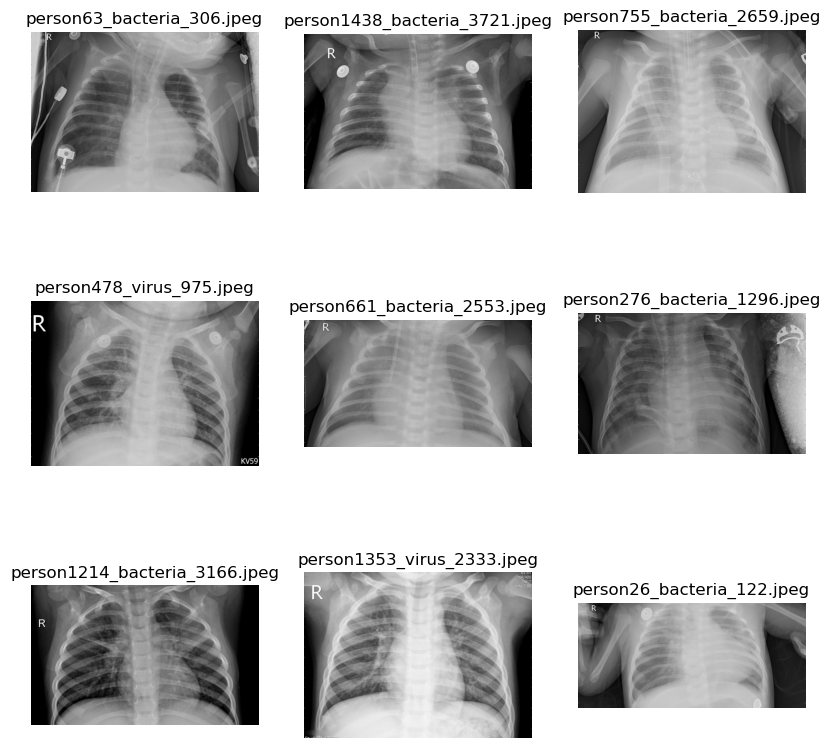

In [18]:
pneumonia_images = os.listdir(pneumonia_folder)

plt.figure(figsize=(10, 10))
for i in range(9):
    img_path = os.path.join(pneumonia_folder, pneumonia_images[i])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(pneumonia_images[i])
    plt.axis('off')

plt.show()

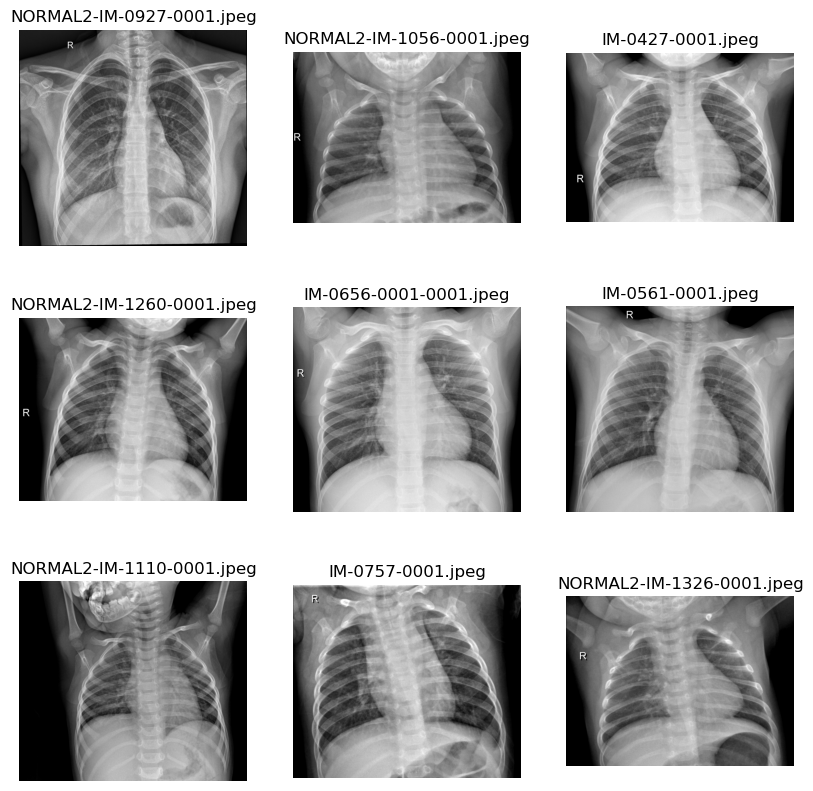

In [20]:
normal_images = os.listdir(normal_folder)

plt.figure(figsize=(10, 10))
for i in range(9):
    img_path = os.path.join(normal_folder, normal_images[i])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(normal_images[i])
    plt.axis('off')

plt.show()

The dimensions of the image are 736 pixels width and 1048 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 119.9751 and the standard deviation is 48.1854


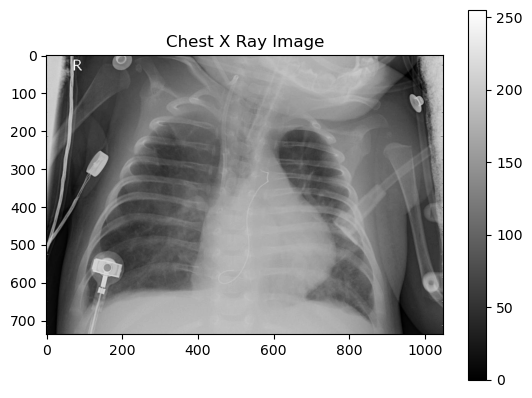

In [22]:
sample_pneumonia_img = plt.imread(os.path.join(pneumonia_folder, pneumonia[0]))
plt.imshow(sample_pneumonia_img, cmap='gray')
plt.colorbar()
plt.title('Chest X Ray Image')

print(f"The dimensions of the image are {sample_pneumonia_img.shape[0]} pixels width and {sample_pneumonia_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_pneumonia_img.max():.4f} and the minimum is {sample_pneumonia_img.min():.4f}")
print(f"The mean value of the pixels is {sample_pneumonia_img.mean():.4f} and the standard deviation is {sample_pneumonia_img.std():.4f}")

The dimensions of the image are 2234 pixels width and 2359 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 124.3910 and the standard deviation is 56.3308


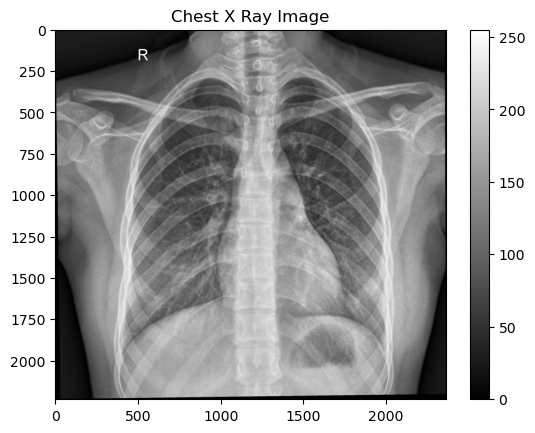

In [24]:
sample_img = plt.imread(os.path.join(normal_folder, normal_images[0]))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

### 2. Image Preprocessing  
Before training my model, We need to prepare the images so they're more suitable for training a convolutional neural network. To do this, We'll use Keras’s `ImageDataGenerator` function for **data preprocessing and augmentation**.  

This function helps me with a couple of important tasks:  
- **Standardizing the images** by transforming their pixel values so that the mean is 0 and the standard deviation is 1. This helps the model train more effectively by ensuring the input distribution is consistent.  
- **Applying data augmentation** to improve model generalization. For now, We’ll use techniques like random horizontal flipping to make the model more robust.  
- Since the pre-trained model We’ll be using expects three-channel images, I'll also **convert my grayscale X-ray images to three-channel format**. We’ll do this by duplicating the single grayscale channel across all three channels.  

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

### Why We Need a Separate Generator for Validation and Testing  

Now, We need to build separate generators for my validation and testing data. But why can’t we just use the same generator we created for training?  

The reason is that the generator we set up for training **normalizes each image per batch** using the statistics of that particular batch (like mean and standard deviation). That’s fine for training because I’m constantly shuffling and augmenting the data.  

However, **we shouldn’t apply the same technique to my validation and test sets**. In real-life scenarios, we’ll be processing incoming images one at a time, not in batches. Using batch statistics during testing would give my model an unfair advantage because it would have extra information about the test data that it wouldn’t have in real applications.  

Instead, we need to normalize the incoming test data using the statistics **computed from the training set**. That way, my model’s performance evaluation will be fair and realistic.  

In [30]:
train = image_generator.flow_from_directory(train_folder, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_folder, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_folder, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 5232 images belonging to 2 classes.
Found 124 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 6.0595 and the minimum is -2.3550
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


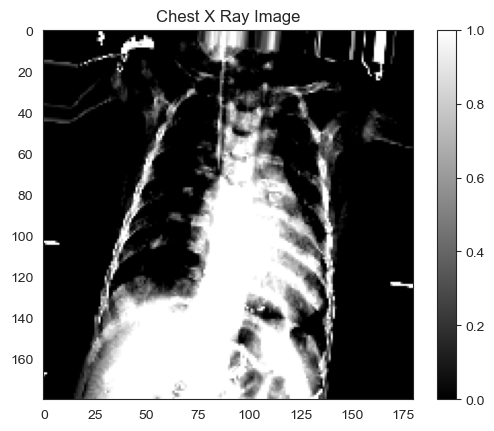

In [32]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

Text(0, 0.5, 'Pixels in Image')

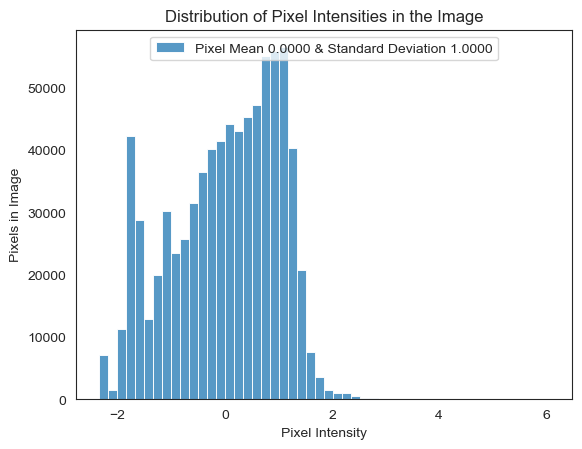

In [34]:
sns.histplot(generated_image.ravel(), 
             label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", 
             kde=False, bins=50)

plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Pixels in Image')

### Building a CNN Model  

#### Impact of Imbalanced Data on Loss Function  

While building my CNN model, we realized that having imbalanced data can mess with my model’s learning process. If we have way more normal X-rays than pneumonia cases, the model can get biased towards predicting the majority class because it gets more feedback from it during training.  

If we just use a regular loss function, the model might end up doing really well at predicting normal X-rays but poorly at detecting pneumonia cases. That’s because it’s trying to minimize the overall error without paying enough attention to the underrepresented class.  

### Solution: Using a Weighted Loss Function  

To tackle this, we are using a weighted loss function. Instead of treating all samples equally, we gave more importance to the minority class (pneumonia cases) by assigning it a higher weight. This way, the model pays more attention to learning from pneumonia images, even if they’re fewer in number.  

By carefully adjusting these weights, we can help the model learn effectively from both classes and make sure it doesn’t ignore the minority class.  

In [37]:
# Class weights
weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


In [39]:
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization

model = Sequential()

# Add Input layer separately for clarity and best practice
model.add(Input(shape=(180, 180, 3)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 178, 178, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 176, 176, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 176, 176, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 88, 88, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 86, 86, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 86, 86, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 84, 84, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 84, 84, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 40, 40, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 40, 40, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 38, 38, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 38, 38, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 46208)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,914,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,203,681 (23.67 MB)

 Trainable params: 6,202,785 (23.66 MB)

 Non-trainable params: 896 (3.50 KB)

In [43]:
r = model.fit(
    train, 
    epochs=10,
    validation_data=validation,
    steps_per_epoch=100,
    validation_steps=25
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 379ms/step - accuracy: 0.7554 - loss: 5.0255 - val_accuracy: 0.0000e+00 - val_loss: 28.7927
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 402ms/step - accuracy: 0.8441 - loss: 1.0844 - val_accuracy: 0.0000e+00 - val_loss: 17.6102
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 427ms/step - accuracy: 0.8917 - loss: 0.3119 - val_accuracy: 0.0000e+00 - val_loss: 44.4382
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 440ms/step - accuracy: 0.8677 - loss: 0.3498 - val_accuracy: 0.0400 - val_loss: 5.5610
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 435ms/step - accuracy: 0.8462 - loss: 0.3514 - val_accuracy: 0.2800 - val_loss: 5.8342
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 441ms/step - accuracy: 0.9327 - loss: 0.2062 - val_accuracy: 0.6400 - val_loss: 0.9043
Epoch 7/10
 54/100 ━━━━━━━━━━━━━━━━━━━━ 25s 557ms/step - accuracy: 0.9223 - loss: 0.2564

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 305ms/step - accuracy: 0.9186 - loss: 0.2664 - val_accuracy: 0.2400 - val_loss: 1.7183
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 486ms/step - accuracy: 0.9130 - loss: 0.3170 - val_accuracy: 0.0800 - val_loss: 3.4630
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 503ms/step - accuracy: 0.9191 - loss: 0.2540 - val_accuracy: 0.3200 - val_loss: 3.3579
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 526ms/step - accuracy: 0.8792 - loss: 0.3100 - val_accuracy: 0.8000 - val_loss: 0.7513


Text(0.5, 1.0, 'Accuracy Evolution')

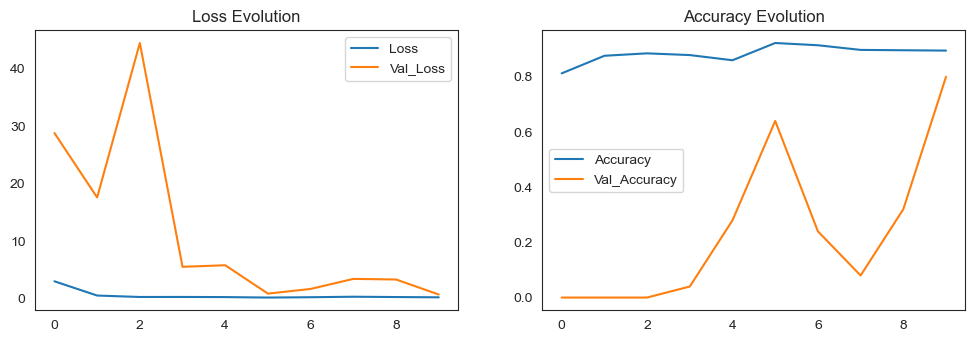

In [45]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [47]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8005 - loss: 0.6374
Test Accuracy: 85.80%
654/654 ━━━━━━━━━━━━━━━━━━━━ 75s 115ms/step - accuracy: 0.9322 - loss: 0.2191
Train Accuracy: 93.00%


In [128]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step
[[  5 183]
 [  0 312]]


,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.630303,0.634,0.815152,0.769309
recall,0.026596,1.000000,0.634,0.513298,0.634000
f1-score,0.051813,0.773234,0.634,0.412524,0.501980
support,188.000000,312.000000,0.634,500.000000,500.000000


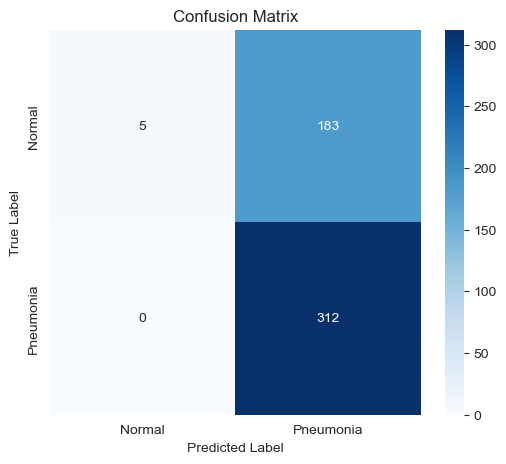

In [132]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test.classes, pred > 0.5)
labels = ['Normal', 'Pneumonia']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [130]:
print(confusion_matrix(test.classes, pred > 0.7))
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))

[[ 15 173]
 [  2 310]]


,0,1,accuracy,macro avg,weighted avg
precision,0.882353,0.641822,0.65,0.762087,0.732262
recall,0.079787,0.993590,0.65,0.536688,0.650000
f1-score,0.146341,0.779874,0.65,0.463108,0.541666
support,188.000000,312.000000,0.65,500.000000,500.000000


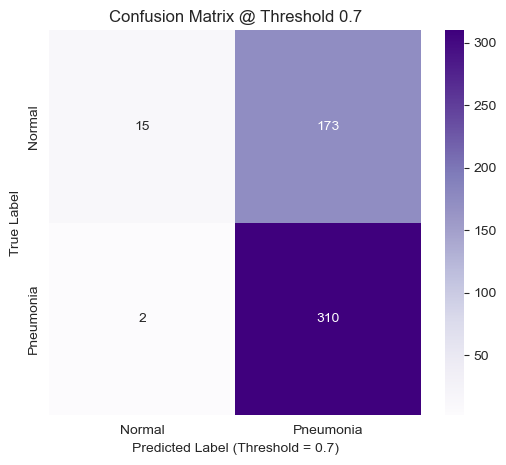

In [134]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_07 = confusion_matrix(test.classes, pred > 0.7)
labels = ['Normal', 'Pneumonia']

plt.figure(figsize=(6, 5))
sns.heatmap(cm_07, annot=True, fmt='d', cmap='Purples',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label (Threshold = 0.7)')
plt.ylabel('True Label')
plt.title('Confusion Matrix @ Threshold 0.7')
plt.show()

In [50]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

base_model = DenseNet121(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 186, 186,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 90, 90,    │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 90, 90,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 90, 90,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 92, 92,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 45, 45,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 45, 45,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 45, 45,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 45, 45,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 45, 45,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 45, 45,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 45, 45,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 45, 45,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 45, 45,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 45, 45,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 45, 45,    │     12,288 │ conv2_block2_0_r

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 6,953,856 (26.53 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [51]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

The model has 428 layers


In [52]:
print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The input shape <KerasTensor shape=(None, 180, 180, 3), dtype=float32, sparse=False, name=keras_tensor_191>
The output shape <KerasTensor shape=(None, 1024), dtype=float32, sparse=False, name=keras_tensor_618>


In [53]:
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [54]:
r = model.fit(
    train, 
    epochs=10,
    validation_data=validation,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.8296 - loss: 0.4507 - val_accuracy: 0.0400 - val_loss: 14.2258
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.8662 - loss: 0.3125 - val_accuracy: 0.8800 - val_loss: 0.2781
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.8896 - loss: 0.2336 - val_accuracy: 0.2800 - val_loss: 3.2981
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.9121 - loss: 0.2383 - val_accuracy: 0.5200 - val_loss: 2.3002
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 99s 995ms/step - accuracy: 0.9012 - loss: 0.2125 - val_accuracy: 0.9600 - val_loss: 0.0580
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 98s 980ms/step - accuracy: 0.9135 - loss: 0.1819 - val_accuracy: 0.0400 - val_loss: 6.7286
Epoch 7/10
 54/100 ━━━━━━━━━━━━━━━━━━━━ 44s 960ms/step - accuracy: 0.9276 - loss: 0.2050

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 525ms/step - accuracy: 0.9215 - loss: 0.2044 - val_accuracy: 0.4000 - val_loss: 2.0752
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 97s 970ms/step - accuracy: 0.9053 - loss: 0.2126 - val_accuracy: 0.7200 - val_loss: 0.6359
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 97s 963ms/step - accuracy: 0.9369 - loss: 0.1433 - val_accuracy: 0.9200 - val_loss: 0.4762
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 99s 994ms/step - accuracy: 0.9270 - loss: 0.1632 - val_accuracy: 0.0400 - val_loss: 5.3417


Text(0.5, 1.0, 'Accuracy Evolution')

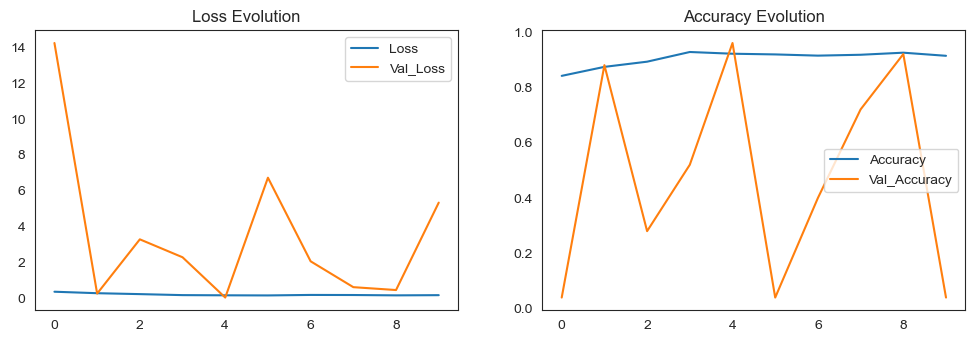

In [55]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [56]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.2899 - loss: 4.2930
Test Accuracy: 63.60%
654/654 ━━━━━━━━━━━━━━━━━━━━ 165s 253ms/step - accuracy: 0.7794 - loss: 1.1045
Train Accuracy: 76.26%


# Evaluation

In [58]:
predicted_vals = model.predict(test, steps=len(test))

500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step


In [59]:
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[  8 180]
 [  0 312]]


,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.634146,0.64,0.817073,0.771707
recall,0.042553,1.000000,0.64,0.521277,0.640000
f1-score,0.081633,0.776119,0.64,0.428876,0.514992
support,188.000000,312.000000,0.64,500.000000,500.000000


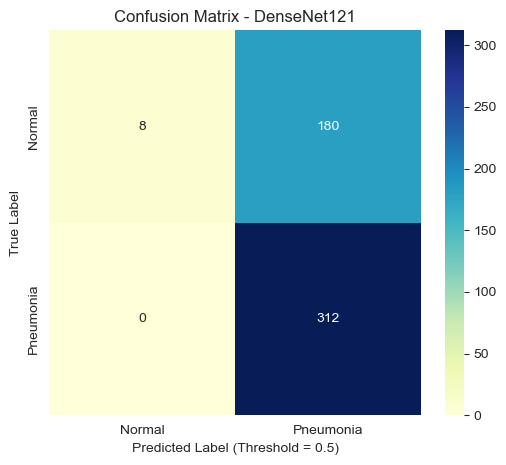

In [136]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test.classes, predicted_vals > 0.5)
labels = ['Normal', 'Pneumonia']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label (Threshold = 0.5)')
plt.ylabel('True Label')
plt.title('Confusion Matrix - DenseNet121')
plt.show()

### VGG16 Model  

While working on a pneumonia detection project, We decided to explore VGG16, a popular convolutional neural network architecture introduced in 2014. What we like about VGG16 is its simplicity and well-organized structure, making it a reliable choice for various image classification tasks.  

The architecture of VGG16 follows a straightforward pattern: it stacks blocks of 2 or 3 convolutional layers, each followed by a pooling layer. One key aspect is that it only uses small 3x3 filters throughout the network, which helps capture fine details from images while keeping the network efficient and manageable.  

At the end of the convolutional layers, there’s a fully connected network with two dense layers, each having 4096 nodes, and a final output layer designed for classification. Even though VGG16 was initially built for ImageNet classification with 1000 categories, we can quickly adapt it for our pneumonia detection task by modifying the final layer.  

We find VGG16 appealing because it's not overly complex but still exploredll powerful enough to extract meaningful features from images. Its classic design also makes it easier to understand and tweak according to my needs.  

In [61]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications import VGG16


vgg16_base_model = VGG16(input_shape=(180,180,3),include_top=False,weights='imagenet')

    


In [62]:
vgg16_base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [138]:

    vgg16_model = tf.keras.Sequential([
        vgg16_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

In [64]:
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    vgg16_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [65]:
r = vgg16_model.fit(train,
          epochs=10,
          validation_data=validation,
          steps_per_epoch=100,
          validation_steps=25
        )

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1184s 12s/step - accuracy: 0.6617 - loss: 0.7386 - precision: 0.8482 - recall: 0.6553 - val_accuracy: 1.0000 - val_loss: 1.0125e-09 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2965s 30s/step - accuracy: 0.7653 - loss: 0.5455 - precision: 0.8760 - recall: 0.7980 - val_accuracy: 0.4000 - val_loss: 0.9485 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2607s 26s/step - accuracy: 0.8116 - loss: 0.4409 - precision: 0.9001 - recall: 0.8481 - val_accuracy: 1.0000 - val_loss: 1.3159e-16 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.7438 - loss: 0.4975 - precision: 0.8245 - recall: 0.8557 - val_accuracy: 0.6000 - val_loss: 0.6502 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 535s 5s/step - accuracy: 0.7985 - loss: 0.4797 - precision: 0.8622 - r

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 2055s 21s/step - accuracy: 0.7200 - loss: 0.5783 - precision: 0.7869 - recall: 0.8361 - val_accuracy: 1.0000 - val_loss: 5.5913e-05 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.8061 - loss: 0.3921 - precision: 0.8673 - recall: 0.8787 - val_accuracy: 0.0000e+00 - val_loss: 3.4783 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.8432 - loss: 0.3533 - precision: 0.8826 - recall: 0.9107 - val_accuracy: 0.6400 - val_loss: 0.7483 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2150s 22s/step - accuracy: 0.8424 - loss: 0.3686 - precision: 0.8799 - recall: 0.9021 - val_accuracy: 0.0000e+00 - val_loss: 4.9923 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


Text(0.5, 1.0, 'Accuracy Evolution')

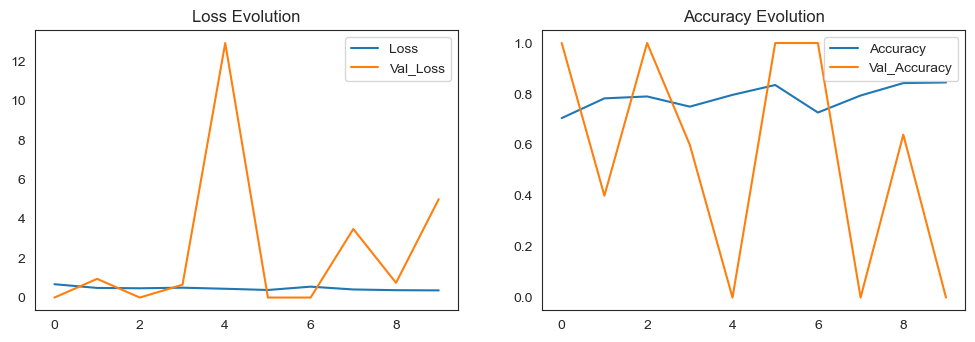

In [66]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [67]:
evaluation =vgg16_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = vgg16_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

500/500 ━━━━━━━━━━━━━━━━━━━━ 899s 2s/step - accuracy: 0.2576 - loss: 3.6823 - precision: 0.2576 - recall: 0.6248
Test Accuracy: 62.40%
654/654 ━━━━━━━━━━━━━━━━━━━━ 8312s 13s/step - accuracy: 0.7366 - loss: 1.1526 - precision: 0.7366 - recall: 1.0000
Train Accuracy: 74.22%


# ResNet

ResNet, introduced in 2015 by Microsoft Research, addresses the vanishing gradient problem in deep networks through **residual learning**. Instead of learning desired outputs directly, ResNet learns the difference (residual) between the input and output using **skip connections** that bypass layers, allowing gradients to flow smoothly during training. This architecture, composed of **residual blocks**, enables training of very deep networks like **ResNet-50, ResNet-101, and ResNet-152**, achieving state-of-the-art results on ImageNet. Its flexibility and effectiveness make it suitable for various tasks beyond image classification, such as detection, segmentation, and NLP.

In [69]:
from keras.applications import ResNet50

resnet_base_model = ResNet50(input_shape=(180,180,3), include_top=False, weights='imagenet')



In [70]:
resnet_base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 186, 186,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 90, 90,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 90, 90,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 90, 90,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 92, 92,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 45, 45,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 45, 45,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 45, 45,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 45, 45,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 45, 45,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 45, 45,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 45, 45,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 45, 45,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 45, 45,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 45, 45,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 45, 45,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [71]:
    resnet_model = tf.keras.Sequential([
        resnet_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    resnet_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [72]:
r = resnet_model.fit(train,
          epochs=10,
          validation_data=validation,
          steps_per_epoch=100,
          validation_steps=25)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1983s 20s/step - accuracy: 0.6320 - loss: 0.7488 - precision: 0.8187 - recall: 0.6352 - val_accuracy: 0.8400 - val_loss: 0.3402 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.6474 - loss: 0.6962 - precision: 0.7745 - recall: 0.7498 - val_accuracy: 0.0000e+00 - val_loss: 1.2539 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.6910 - loss: 0.6291 - precision: 0.7730 - recall: 0.8480 - val_accuracy: 0.0000e+00 - val_loss: 2.1841 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 97s 967ms/step - accuracy: 0.7018 - loss: 0.6235 - precision: 0.7729 - recall: 0.8727 - val_accuracy: 0.0000e+00 - val_loss: 1.9467 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 96s 949ms/step - accuracy: 0.6967 - loss: 0.6702 - precision: 0.7116

Text(0.5, 1.0, 'Accuracy Evolution')

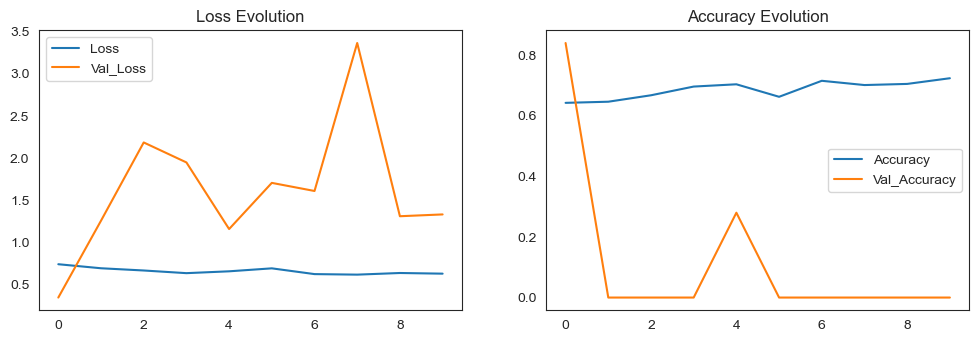

In [73]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [74]:
evaluation =resnet_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = resnet_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.2576 - loss: 1.0464 - precision: 0.2576 - recall: 0.6248
Test Accuracy: 62.40%
654/654 ━━━━━━━━━━━━━━━━━━━━ 149s 228ms/step - accuracy: 0.7476 - loss: 0.5620 - precision: 0.7476 - recall: 1.0000
Train Accuracy: 74.22%


500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step


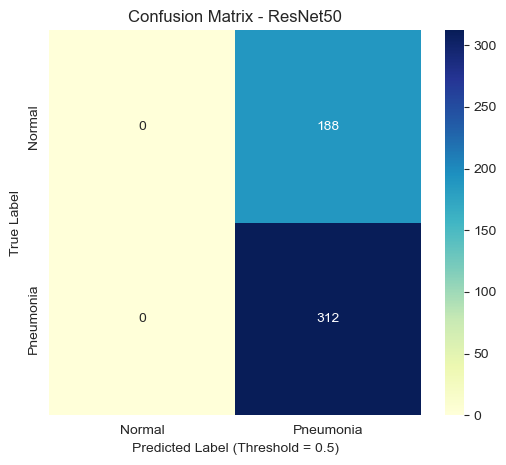

In [141]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predicted_vals = resnet_model.predict(test, steps=len(test))

cm = confusion_matrix(test.classes, predicted_vals > 0.5)
labels = ['Normal', 'Pneumonia']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label (Threshold = 0.5)')
plt.ylabel('True Label')
plt.title('Confusion Matrix - ResNet50')
plt.show()

# InceptionNet

InceptionNet, also known as GoogleNet, is a powerful deep learning architecture introduced by Google in 2014. What makes it unique is its use of **Inception modules**, which allow the network to capture complex patterns and features efficiently by applying **multiple filter sizes (1x1, 3x3, 5x5)** simultaneously within the same module. This parallel architecture helps the model learn different aspects of the image at various scales, enhancing its ability to detect intricate features. By including **1x1 convolutions**, it also reduces the number of parameters, making training faster and more efficient. The overall design promotes a balance between depth and width, allowing for improved performance without excessive computational costs.



In [76]:
from keras.applications import InceptionV3

inception_base_model = InceptionV3(input_shape=(180,180,3),include_top=False,weights='imagenet')



In [77]:
    inception_model = tf.keras.Sequential([
        inception_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    inception_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [78]:
r = inception_model.fit(train,
          epochs=10,
          validation_data=validation,
          steps_per_epoch=100,
          validation_steps=25)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 70s 556ms/step - accuracy: 0.5348 - loss: 0.8339 - precision: 0.7667 - recall: 0.5409 - val_accuracy: 0.0000e+00 - val_loss: 12.4380 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 962s 10s/step - accuracy: 0.6946 - loss: 0.5921 - precision: 0.8159 - recall: 0.7406 - val_accuracy: 1.0000 - val_loss: 0.0276 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 968s 10s/step - accuracy: 0.7556 - loss: 0.5291 - precision: 0.8550 - recall: 0.8081 - val_accuracy: 0.8000 - val_loss: 0.6469 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 531ms/step - accuracy: 0.8174 - loss: 0.4403 - precision: 0.8640 - recall: 0.8999 - val_accuracy: 0.0400 - val_loss: 1740.8994 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 557ms/step - accuracy: 0.7689 - loss: 0.5065 - precision: 0.8272 -

Text(0.5, 1.0, 'Accuracy Evolution')

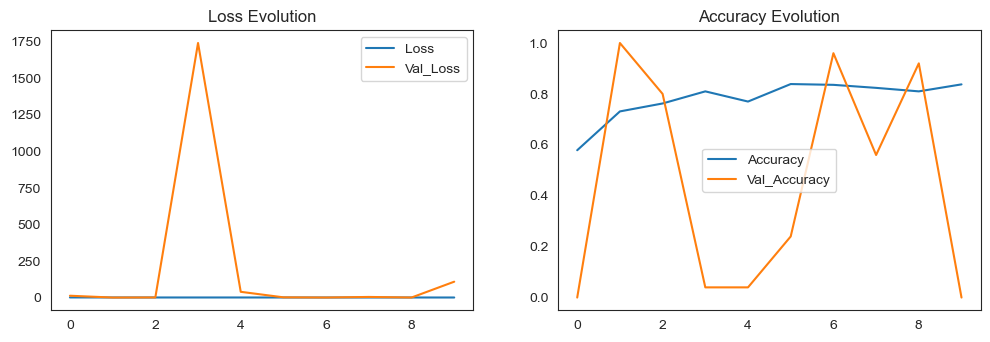

In [79]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [80]:
evaluation =inception_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = inception_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.2895 - loss: 85.2351 - precision: 0.2619 - recall: 0.6248
Test Accuracy: 63.60%
654/654 ━━━━━━━━━━━━━━━━━━━━ 105s 160ms/step - accuracy: 0.7532 - loss: 45.4424 - precision: 0.7524 - recall: 0.9971
Train Accuracy: 74.83%


500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step


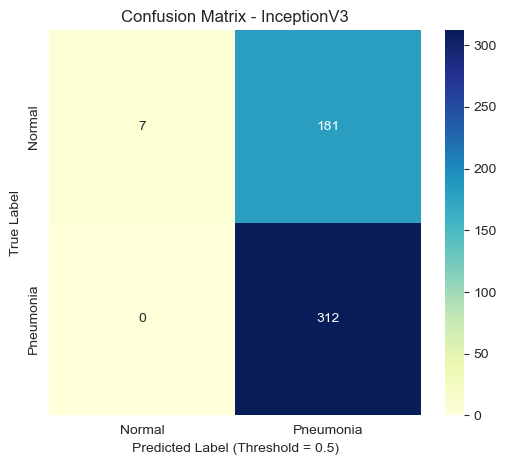

In [143]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predicted_vals = inception_model.predict(test, steps=len(test))

cm = confusion_matrix(test.classes, predicted_vals > 0.5)
labels = ['Normal', 'Pneumonia']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label (Threshold = 0.5)')
plt.ylabel('True Label')
plt.title('Confusion Matrix - InceptionV3')
plt.show()